## Localisation, Diversification, and Scaling

In this notebook we will write functions to analyse the vectors of research, teaching and jobs, for one year.

In [1]:
import csv
import json
import operator

In [2]:
import numpy as np

### Loading Data

In this section, we will load all of our vectors. 

In [3]:
def read_vectors(file_name):
    line = open(file_name, "r")
    for l in line:
        d = eval(l)
    clean_dict = {}
    for key in d:
        clean_dict[eval(key)] = eval(d[key])
    return clean_dict

In [5]:
# research_cities = read_vectors("../research data/research_vectors_cities_yearwise.txt")

In [6]:
research_orgs = read_vectors("../research data/research_vectors_orgs_yearwise.txt")

In [6]:
# teaching_cities = read_vectors("../teaching data/teaching_vectors_cities_yearwise.txt")

In [7]:
teaching_orgs = read_vectors("../teaching data/teaching_vectors_orgs_yearwise.txt")

In [8]:
# jobs_cities = read_vectors("../jobs data/jobs_vectors_cities_cleaned_2010.txt")

In [20]:
total_papers = 0

In [21]:
for r_org in research_orgs:
    if research_orgs[r_org][2] > 100:
        total_papers += research_orgs[r_org][2]

In [23]:
total_papers

2808749

In [24]:
len(research_orgs)

94154

In [12]:
total_papers / len(research_orgs)

33.99775899058989

In [32]:
total_syllabi = 0

In [33]:
total_teaching = 0

In [34]:
for t_org in teaching_orgs:
    if teaching_orgs[t_org][2] > 100:
        total_syllabi += teaching_orgs[t_org][2]
        total_teaching += 1

In [35]:
total_syllabi

860539

In [31]:
total_teaching

1192

In [16]:
total_syllabi / len(teaching_orgs)

104.83549643088904

### angles

Our vectors come with three different kinds of information - the mean, the variance, and the number of articles used to create these metrics. One basic tool of analysis we can use is to create angles of difference to measure similarities. This section will contain methods to generate these angles, as well as functions to find most and least similar institutions. 

In [8]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [9]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    if v1 is None or v2 is None:
        return (None, None)
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    cos = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)
    return np.arccos(cos)*57.2958 , cos

In [10]:
def find_similar(name, dictionary, n=5, reverse=False):
    angles = {}
    for entity in dictionary:
        if entity != name:
            angles[entity] = round(angle_between(dictionary[entity][0], dictionary[name][0])[0], 3)
    
    sorted_n = sorted(angles.items(), key=operator.itemgetter(1))
    if not reverse:
        return(sorted_n[0:n])
    if reverse:
        sorted_n.reverse()
        return(sorted_n[0:n])

In [12]:
find_similar(('Cambridge', 2010), teaching_cities)

[(('Cambridge', 2011), 11.01),
 (('Cambridge', 2013), 11.538),
 (('Cambridge', 2012), 11.605),
 (('Cambridge', 2014), 13.19),
 (('Cambridge', 2015), 13.37)]

In [13]:
find_similar(('Cambridge', 2010), research_cities)

[(('Cambridge', 2011), 1.909),
 (('Cambridge', 2012), 2.426),
 (('Cambridge', 2013), 2.685),
 (('Cambridge', 2014), 3.749),
 (('Cambridge', 2015), 4.118)]

In [14]:
find_similar(('Chicago', 2010), teaching_cities)

[(('New York', 2015), 14.251),
 (('New York', 2016), 14.495),
 (('New York', 2014), 14.971),
 (('New York', 2013), 15.001),
 (('New York', 2010), 15.066)]

In [15]:
find_similar(('Chicago', 2010), research_cities)

[(('Chicago', 2011), 1.874),
 (('Chicago', 2012), 2.072),
 (('Chicago', 2013), 2.884),
 (('Chicago', 2014), 3.882),
 (('New York', 2011), 3.982)]

In [21]:
def count_entities(vectors, min_papers=100, kind=""):
    count = 0
    for vec in vectors:
        if vectors[vec][2] > min_papers and kind in vec[0].lower():
            print(vec, vectors[vec][2])
            count += 1
    return count

In [26]:
count_entities(research_orgs, kind="hosp", min_papers=20)

('NW Mem Hosp', 2010) 50
('Massachusetts Gen Hosp', 2010) 2229
('Brigham & Womens Hosp', 2010) 1858
('Nationwide Childrens Hosp', 2010) 193
('San Francisco Gen Hosp', 2010) 79
('Scott & White Mem Hosp & Clin', 2010) 54
('Mt Sinai Hosp', 2010) 74
('Cincinnati Childrens Hosp', 2010) 464
('Childrens Mercy Hosp & Clin', 2010) 64
('Childrens Hosp Philadelphia', 2010) 644
('N Shore Univ Hosp', 2010) 82
('Methodist Hosp', 2010) 268
('Univ Iowa Hosp & Clin', 2010) 143
('Cincinnati Childrens Hosp Med Ctr', 2010) 235
('Hutzel Womens Hosp', 2010) 24
('Hartford Hosp', 2010) 87
('Thomas Jefferson Univ Hosp', 2010) 127
('Seattle Childrens Hosp', 2010) 128
('Johns Hopkins Univ Hosp', 2010) 312
('Childrens Hosp', 2010) 909
('Phoenix Childrens Hosp', 2010) 28
('Hosp Special Surg', 2010) 188
('Washington Hosp Ctr', 2010) 137
('Henry Ford Hosp', 2010) 280
('Butler Hosp', 2010) 23
('Miriam Hosp', 2010) 47
('St Jude Childrens Hosp', 2010) 454
('St Josephs Hosp', 2010) 152
('Texas Scottish Rite Hosp Childre

617

In [81]:
count_entities(teaching_orgs, kind="texas", min_papers=20)

('Texas A & M University-Commerce', 2012) 956
('The University of Texas at San Antonio', 2015) 2464
('Texas A & M International University', 2015) 567
('University of North Texas', 2013) 2424
('Texas State University', 2015) 3419
('University of North Texas', 2012) 2149
('The University of Texas at Dallas', 2012) 1831
('The University of Texas at Dallas', 2010) 1575
('The University of Texas at Dallas', 2016) 2242
('The University of Texas at Austin', 2014) 1596
('Texas State University', 2012) 3124
('Texas A & M University-College Station', 2013) 3908
('Northeast Texas Community College', 2014) 228
('Texas A & M University-College Station', 2015) 4477
('Texas A & M University-Commerce', 2011) 1761
('The University of Texas at Arlington', 2016) 2824
('Texas A & M University-Commerce', 2010) 1005
('Texas A & M University-Commerce', 2013) 1634
('University of North Texas', 2010) 1344
('Texas State University', 2014) 2781
('Texas A & M University-Commerce', 2014) 2039
('The University of 

110

In [18]:
count_entities(research_orgs, kind="", min_papers=200)

('Univ Chicago', 2010) 3080
('Univ Chicago', 2011) 3154
('Univ Chicago', 2012) 3394
('Univ Chicago', 2013) 3530
('Loyola Univ Chicago', 2013) 210
('Univ Chicago', 2014) 3545
('Univ Chicago', 2015) 3320
('Loyola Univ Chicago', 2015) 216


8

#### NOTE

So our syllabi dataset is a lot smaller than Research and Jobs - we have to keep this in mind...

### Aggregating and Separating

We will include functions to both draw out a certain year as well as combine all of them.

In [19]:
def extract_year(vectors, year):
    extracted_year = {}
    for vector in vectors:
        if year == vector[1]:
            extracted_year[vector[0]] = vectors[vector]
    return extracted_year

In [20]:
research_cities_2010 = extract_year(research_cities, 2010)

In [21]:
teaching_cities_2010 = extract_year(teaching_cities, 2010)

In [22]:
jobs_cities_2010 = extract_year(jobs_cities, 2010)

In [23]:
len(research_cities_2010), len(teaching_cities_2010), len(jobs_cities_2010)

(2878, 857, 14891)

In [24]:
list(jobs_cities_2010.keys())[0:20]

['Palatine',
 'Atlanta',
 'Gresham',
 'Madison',
 'Columbus',
 'Roseburg',
 'Rochester',
 'Florence',
 'Las Vegas',
 'Harrisburg',
 'Philadelphia',
 'Portland',
 'Macon',
 'Yarmouth',
 'Canby',
 'Albuquerque',
 'New Berlin',
 'Houston',
 'Raleigh',
 'York']

In [25]:
list(research_cities_2010.keys())[0:20]

['Boston',
 'Austin',
 'Minneapolis',
 'Cleveland',
 'Berkeley',
 'Los Alamos',
 'Albuquerque',
 'College Stn',
 'Greenville',
 'Farmington',
 'Los Angeles',
 'Durham',
 'Chicago',
 'Santa Cruz',
 'Edwardsville',
 'Macon',
 'Philadelphia',
 'Ithaca',
 'Woods Hole',
 'Baton Rouge']

In [26]:
list(teaching_cities_2010.keys())[0:20]

['Tuscaloosa',
 'Wilkes-Barre',
 'Richardson',
 'Albany',
 'Irvine',
 'Charleston',
 'Santa Rosa',
 'Lawrence',
 'Tucson',
 'Tallahassee',
 'San Jose',
 'Brainerd',
 'Commerce',
 'Athens',
 'New Orleans',
 'Atlanta',
 'Gainesville',
 'Chestnut Hill',
 'Denton',
 'Amarillo']

In [27]:
find_similar("Chicago", research_cities_2010)

[('Philadelphia', 4.049),
 ('New York', 4.069),
 ('Los Angeles', 4.503),
 ('Durham', 5.011),
 ('Pittsburgh', 5.138)]

In [28]:
find_similar("Chicago", teaching_cities_2010)

[('New York', 15.066),
 ('Washington', 16.361),
 ('Pittsburgh', 17.313),
 ('New Haven', 17.897),
 ('Saint Louis', 18.499)]

In [29]:
find_similar("Chicago", jobs_cities_2010, n=15)

[('Villa Park', 17.831),
 ('Downers Grove', 17.946),
 ('Charlotte', 18.972),
 ('Blue Island', 19.13),
 ('Schaumburg', 20.237),
 ('Naperville', 20.67),
 ('Hinsdale', 21.085),
 ('Atlanta', 21.621),
 ('Minneapolis', 21.792),
 ('New York', 22.103),
 ('Parsippany', 22.318),
 ('King Of Prussia', 22.371),
 ('Creve Coeur', 22.415),
 ('White Plains', 22.732),
 ('Saint Louis', 22.738)]

In [30]:
find_similar("New York", jobs_cities_2010, n=15, reverse=True)

[('Hornsby', 91.826),
 ('Dolliver', 90.624),
 ('Karlstad', 90.546),
 ('Perkinston', 89.509),
 ('Church Creek', 89.23),
 ('Salcha', 88.978),
 ('Martinsdale', 88.394),
 ('Tigerton', 88.36),
 ('Danube', 88.203),
 ('Moffett', 87.962),
 ('Brownell', 87.899),
 ('Broadford', 87.874),
 ('Steinauer', 87.838),
 ('Vaiden', 87.741),
 ('Salt Rock', 87.699)]

In [31]:
find_similar("Atlanta", jobs_cities_2010, n=15)

[('Norcross', 18.556),
 ('Charlotte', 21.079),
 ('Alpharetta', 21.559),
 ('Chicago', 21.621),
 ('Cincinnati', 22.007),
 ('Tampa', 22.456),
 ('Dallas', 22.619),
 ('Jacksonville', 22.785),
 ('Irving', 22.976),
 ('Raleigh', 23.157),
 ('Schaumburg', 23.16),
 ('Columbus', 23.203),
 ('Glen Allen', 23.212),
 ('King Of Prussia', 23.288),
 ('Villa Park', 23.398)]

In [32]:
find_similar("San Francisco", jobs_cities_2010, n=15)

[('San Mateo', 14.691),
 ('Redwood City', 19.85),
 ('Emeryville', 20.207),
 ('Irvine', 20.511),
 ('Santa Monica', 20.861),
 ('San Bruno', 21.24),
 ('Los Angeles', 21.26),
 ('San Jose', 21.304),
 ('Palo Alto', 22.177),
 ('San Diego', 22.581),
 ('Culver City', 22.779),
 ('New York', 23.005),
 ('Chicago', 23.065),
 ('Pleasanton', 23.125),
 ('Atherton', 23.786)]

In [33]:
find_similar("Seattle", jobs_cities_2010)

[('Kirkland', 20.598),
 ('Issaquah', 22.388),
 ('Bothell', 22.759),
 ('San Francisco', 23.928),
 ('Portland', 24.255)]

In [11]:
def aggregate_years(vectors):
    aggregate_vectors = {}
    for vector in vectors:
        if vector[0] not in aggregate_vectors:
            aggregate_vectors[vector[0]] = ([], [])
        if vector[0] in aggregate_vectors:
            aggregate_vectors[vector[0]][0].append(vectors[vector][0])
            aggregate_vectors[vector[0]][1].append(vectors[vector][2])

    for vector in aggregate_vectors:
        mean = np.mean(aggregate_vectors[vector][0], axis=0)
        sum_ = sum(aggregate_vectors[vector][1])
        aggregate_vectors[vector] = (mean, 0, sum_)
    return aggregate_vectors


In [ ]:
# research_cities_all = aggregate_years(research_cities)

In [ ]:
# teaching_cities_all = aggregate_years(teaching_cities)

In [17]:
research_orgs_all = aggregate_years(research_orgs)

In [18]:
teaching_orgs_all = aggregate_years(teaching_orgs)

In [67]:
list(teaching_orgs_all.keys())[0:10]

['Angelo State University',
 'University of Mississippi',
 'University of Georgia',
 'Kean University',
 'The University of Alabama',
 'Lansing Community College',
 'University of West Georgia',
 'Park University',
 'Stephen F Austin State University',
 'North Seattle College']

In [68]:
teaching_orgs_all['Angelo State University']

(array([-0.90838057, -0.31899755, -1.43096009, -0.46604093, -1.04739869,
        -0.60351375,  0.19954474,  2.99272496,  0.32655314, -1.70021302,
        -1.01662555, -0.19809581,  0.09530848,  1.18306642,  0.20680384,
        -1.22090467, -1.66189124, -0.4391359 ,  1.7919379 ,  0.19426606,
        -1.75103572, -0.78693174, -1.23042495, -1.06617177,  0.83827857,
         0.3329618 ,  0.39976607,  0.53389834, -0.63015254,  0.0273231 ,
        -2.21128021, -0.67515228, -0.21688462,  1.34646007, -0.65788286,
        -0.42141765,  0.53445435,  0.77616789, -1.21066662, -0.00985664,
        -0.72557062, -1.1067824 ,  0.87012406,  0.92668579, -0.11392399,
         1.09511954,  0.08099982, -0.86161223, -0.27181028, -0.95013257,
        -1.25169994, -1.40751762, -1.93343033,  0.34203663,  0.32930964,
         0.16903087, -0.27631502,  1.31303574,  0.70076833,  0.05504277,
        -0.21554392, -1.9165045 , -0.39641944, -1.79832714,  0.20533172,
        -1.18256181,  0.80963142,  0.70217913,  2.2

In [ ]:
georgia_tech_vector = np.array(research_orgs_all['Georgia Tech'][0]) + np.array(research_orgs_all['Georgia Inst Technol'][0]) / 2.0

In [ ]:
georgia_tech_paper_count = (research_orgs_all['Georgia Tech'][2] + research_orgs_all['Georgia Inst Technol'][2]) 

In [ ]:
research_orgs_all['Georgia Tech'] = (georgia_tech_vector, 0, georgia_tech_paper_count)

In [16]:
find_similar("Chicago", research_cities_all)

[('Philadelphia', 3.782),
 ('Los Angeles', 4.524),
 ('Durham', 4.753),
 ('Nashville', 5.251),
 ('Baltimore', 5.38)]

In [24]:
find_similar("Univ Chicago", research_orgs_all, n=10)

[('Stanford Univ', 6.628),
 ('Univ Michigan', 6.848),
 ('Yale Univ', 6.887),
 ('Univ Calif Los Angeles', 7.483),
 ('Indiana Univ', 7.735),
 ('Univ Calif Irvine', 7.884),
 ('Univ Rochester', 8.017),
 ('NYU', 8.099),
 ('Univ Utah', 8.16),
 ('Univ Calif San Diego', 8.293)]

In [20]:
find_similar("MIT", research_orgs_all, n=10)

[('Rice Univ', 7.226),
 ('Univ Notre Dame', 8.474),
 ('Princeton Univ', 9.638),
 ('Rensselaer Polytech Inst', 9.836),
 ('CUNY City Coll', 10.326),
 ('Purdue Univ', 10.447),
 ('Univ Delaware', 10.643),
 ('Univ Cent Florida', 10.94),
 ('Lehigh Univ', 10.983),
 ('New Jersey Inst Technol', 11.152)]

In [27]:
find_similar("Massachusetts Gen Hosp", research_orgs_all, n=10)

[('Beth Israel Deaconess Med Ctr', 6.166),
 ('Univ Calif San Francisco', 6.426),
 ('Univ Texas Houston', 6.443),
 ('Weill Cornell Med Coll', 6.447),
 ('UCSF', 6.943),
 ('Johns Hopkins Sch Med', 6.953),
 ('Univ Texas Hlth Sci Ctr Houston', 7.613),
 ('Mt Sinai Sch Med', 7.689),
 ('Vanderbilt Univ Sch Med', 8.042),
 ('Oregon Hlth & Sci Univ', 8.069)]

In [45]:
find_similar("Harvard Univ", research_orgs_all, n=10)

[('Vanderbilt Univ', 16.106),
 ('Rutgers State Univ', 16.145),
 ('Univ Penn', 16.386),
 ('Wake Forest Univ Hlth Sci', 16.457),
 ('Indiana Univ Sch Med', 16.522),
 ('Univ Colorado Denver', 16.564),
 ('Albert Einstein Coll Med', 16.6),
 ('Univ Nebraska Med Ctr', 16.776),
 ('Mt Sinai Sch Med', 16.8),
 ('Univ Texas Hlth Sci Ctr San Antonio', 16.85)]

In [47]:
find_similar("UT Austin", research_orgs_all, n=10)

[('Carnegie Mellon Univ', 26.09),
 ('UIUC', 26.239),
 ('Georgia Tech', 26.608),
 ('IIT', 26.946),
 ('IBM TJ Watson Res Ctr', 27.16),
 ('Microsoft Corp', 27.698),
 ('Stevens Inst Technol', 27.787),
 ('Worcester Polytech Inst', 27.945),
 ('New Jersey Inst Technol', 27.994),
 ('Microsoft Res', 28.523)]

In [80]:
find_similar("Stanford University", teaching_orgs_all, n=15)

[('Cornell University', 19.812),
 ('University of Virginia-Main Campus', 20.154),
 ('Brown University', 20.432),
 ('University of California-Santa Barbara', 20.574),
 ('University of California-Santa Cruz', 21.031),
 ('University of Massachusetts-Boston', 21.206),
 ('University of Maryland-College Park', 21.215),
 ('University of Washington-Seattle Campus', 21.378),
 ('Indiana University-Bloomington', 21.38),
 ('Villanova University', 21.494),
 ('The New School', 21.815),
 ('Carnegie Mellon University', 21.873),
 ('University at Buffalo', 21.933),
 ('University of California-San Diego', 22.321),
 ('University of Chicago', 22.476)]

## Visualising Vectors 

In this section we will visualise different sections of the knowledge space to demonstrate the consistency of our vectors.

In [28]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [48]:
research_entities = ['Univ Chicago', 'MIT', 'Massachusetts Gen Hosp', 'Harvard Univ', 'UT Austin']

In [54]:
def get_cluster_embeddings(entity_keys, vectors):
    embedding_clusters = []
    entity_clusters = []
    # find closest words and add them to cluster
    for entity in entity_keys:
        embeddings = []
        entities = []
        embeddings.append(vectors[entity][0])
        entities.append(entity)
        for similar_entity, _ in find_similar(entity, vectors, n=7):
            entities.append(similar_entity)
            embeddings.append(vectors[similar_entity][0])
        
        embedding_clusters.append(embeddings)
        entity_clusters.append(entities)
    # get embeddings for the words in clusers
    
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

    return embeddings_en_2d, entity_clusters

In [55]:
embeddings_en_2d, entity_clusters = get_cluster_embeddings(research_entities, research_orgs_all)

In [56]:
def tsne_plot_similar_words(title, labels, embedding_clusters,
                            entity_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, entity_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, color=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word,
                       alpha=0.5,
                       xy=(x[i], y[i]),
                       xytext=(5, 2),
                       textcoords='offset points',
                       ha='right',
                       va='bottom',
                       size=10,
                       color='black')
        plt.legend(loc="lower left")
        plt.title(title)
        plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

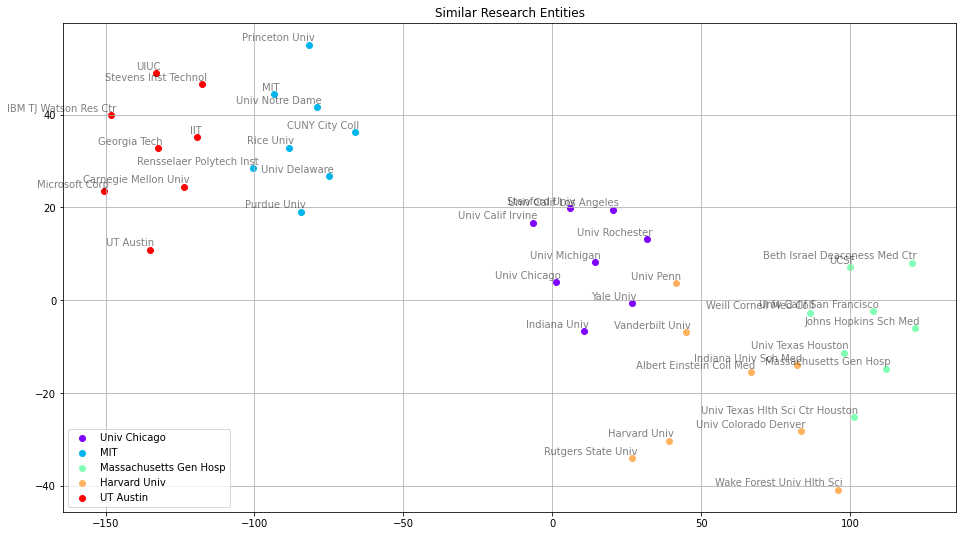

In [57]:
tsne_plot_similar_words('Similar Research Entities', research_entities, embeddings_en_2d, entity_clusters, 1.0)

In [83]:
teaching_entities = ['University of Chicago', 'Lansing Community College', 'Massachusetts Institute of Technology', 'Stanford University', 'Texas State University']

In [84]:
embeddings_en_2d, entity_clusters = get_cluster_embeddings(teaching_entities, teaching_orgs_all)

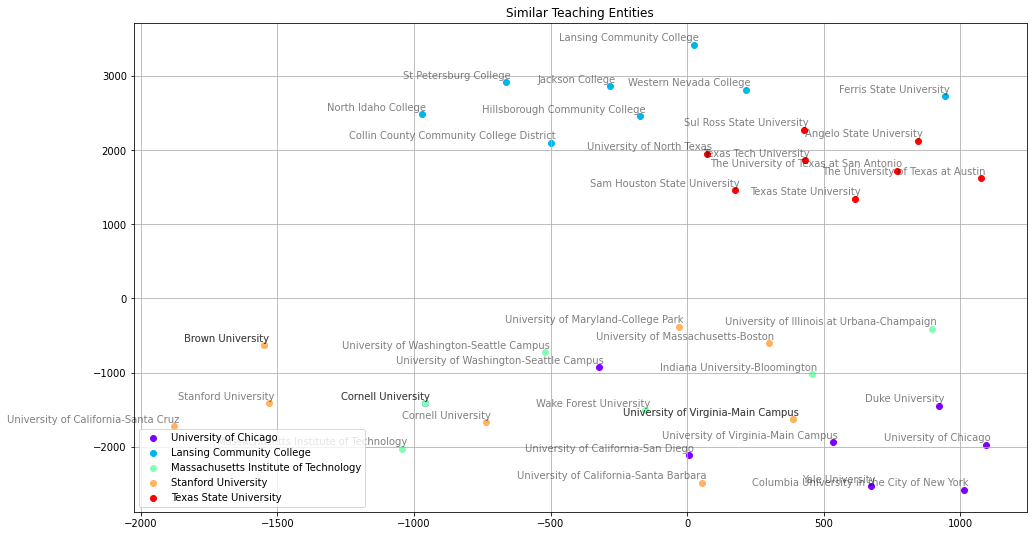

In [88]:
tsne_plot_similar_words('Similar Teaching Entities', teaching_entities, embeddings_en_2d, entity_clusters, 1)

## Matching Research and Teaching

Quickly whip up a way to match research and teaching, so that we can use this for future analysis.

In [19]:
import json

In [20]:
with open("../metadata/teaching_to_research_matching.txt") as file:
    teaching_to_research = json.load(file)

In [21]:
teaching_to_research_match = {}

In [22]:
for teach_org in teaching_to_research:
    if teaching_to_research[teach_org][1] > 90:
        teaching_to_research_match[teach_org] = teaching_to_research[teach_org][0]

In [23]:
teaching_to_research_match['University of California-Berkeley'] = 'Univ Calif Berkeley'

In [24]:
teaching_to_research_match['University of Washington-Seattle Campus'] = 'Univ Washington'

In [25]:
teaching_to_research_match['Georgia Institute of Technology-Main Campus'] = 'Georgia Tech'

In [26]:
teaching_to_research_match['University of Pittsburgh-Pittsburgh Campus'] = 'Univ Pittsburgh'

In [27]:
teaching_to_research_match['Ohio State University-Main Campus'] = 'Ohio State Univ'

In [28]:
teaching_to_research_match['Texas A & M University-College Station'] = 'Texas A&M Univ'

## Location Based Differences and Patterns

In this section, we will use different sampling techniques to test some hypothesis. We will be identifying ranges of angular similarities for different sets:

1) Research vs Teaching
- hypothesis is that research differs more on average than teaching 

2) Spatial hypothesis
- that for smaller units, research is more similar. 


Note: we will be trying this first with aggregate vectors.

Sampling strategy:



In [29]:
import random

In [30]:
research_differences = []

In [31]:
teaching_differences = []


In [32]:
research_pairs = random.sample(list(research_orgs_all.keys()), 2)


In [33]:
research_pairs

['Procter & Gamble', 'Univ Clarckson']

In [34]:
n_samples = 1000

In [35]:
for i in range(0, n_samples):
    research_pairs = random.sample(list(research_orgs_all.keys()), 2)
    teaching_pairs = random.sample(list(teaching_orgs_all.keys()), 2)
    research_difference = angle_between(research_orgs_all[research_pairs[0]][0], research_orgs_all[research_pairs[1]][0])[0]
    teaching_difference = angle_between(teaching_orgs_all[teaching_pairs[0]][0], teaching_orgs_all[teaching_pairs[1]][0])[0]
    research_differences.append(research_difference)
    teaching_differences.append(teaching_difference)

Before we construct intervals for these, let us also sample research but for different locational sub-sets.

## State Analysis

We will sample from across the country, then for two who are in the same state, then for two in the same MSA, and then for two in the same city. We will start with research.

In [36]:
reader = csv.reader(open("../metadata/state_unis.csv"))

In [37]:
states = {}

In [38]:
for k,v in reader:
    states[k] = eval(v)

In [39]:
for state in states:
    print(state, len(states[state]))

TX 119
MS 27
MA 87
CA 217
GA 61
NJ 43
MI 67
FL 69
AL 44
NM 15
MO 53
NC 84
NY 152
OH 75
IL 102
WA 49
MD 41
SC 44
MT 10
KY 31
IA 39
LA 28
UT 13
CO 34
HI 11
OK 34
WY 7
PA 111
IN 40
AZ 23
VA 63
VT 15
WI 53
ID 11
AR 31
DC 8
TN 51
OR 35
NV 9
MN 57
NH 15
KS 44
RI 10
ME 18
WV 19
AK 5
SD 10
NE 23
ND 11
CT 31
DE 5
 1


In [40]:
within_state_research_differences = {}

In [41]:
state_research_differences = []

In [42]:
state_teaching_differences = []

In [43]:
while(len(state_research_differences) < n_samples):
    state = random.choice(list(states.keys()))
    if len(states[state]) > 2:
        state_teaching_pair = random.sample(states[state], 2)
    elif len(states[state]) == 2:
        state_teaching_pair = states[state]
    else:
        continue
    try:
        state_research_pair = [teaching_to_research_match[state_teaching_pair[0]], teaching_to_research_match[state_teaching_pair[1]]]
    except KeyError:
        continue
    try:
        research_difference = angle_between(research_orgs_all[state_research_pair[0]][0], research_orgs_all[state_research_pair[1]][0])[0]
        teaching_difference = angle_between(teaching_orgs_all[state_teaching_pair[0]][0], teaching_orgs_all[state_teaching_pair[1]][0])[0]
    except KeyError:
        print(state_research_pair, state_teaching_pair)
        continue
    state_research_differences.append(research_difference)
    state_teaching_differences.append(teaching_difference)

['Univ Las Vegas Nevada', 'Univ Nevada Reno'] ['University of Nevada-Las Vegas', 'University of Nevada-Reno']
['Univ Maine', 'Coll Atlantic'] ['University of Maine', 'College of the Atlantic']
['Cent Carolina Community Coll', 'Piedmont Community Coll'] ['Central Carolina Community College', 'Piedmont Community College']
['Stevenson Univ', 'Univ Maryland Baltimore County'] ['Stevenson University', 'University of Maryland-Baltimore County']
['Winona State Univ', 'Concordia Univ St Paul'] ['Winona State University', 'Concordia University-Saint Paul']
['Coll Southern Nevada', 'Univ Las Vegas Nevada'] ['College of Southern Nevada', 'University of Nevada-Las Vegas']
['Hobart & William Smith Colleges', 'United States Merchant Marine Acad'] ['Hobart William Smith Colleges', 'United States Merchant Marine Academy']
['Albertus Magnus Coll', 'Univ Hartford'] ['Albertus Magnus College', 'University of Hartford']
['Granite State Coll', 'St Anselm Coll'] ['Granite State College', 'Saint Anselm Colle

['United States Naval Acad', 'Univ Maryland Baltimore County'] ['United States Naval Academy', 'University of Maryland-Baltimore County']
['Hazard Community & Tech Coll', 'Sullivan Univ'] ['Hazard Community and Technical College', 'Sullivan University']
['Kings Community Coll', 'Univ Mississippi'] ['Hinds Community College', 'University of Mississippi']
['Dumont Univ', 'Utah Valley Univ'] ['Neumont University', 'Utah Valley University']
['Yavapai Coll', 'Dine Coll'] ['Yavapai College', 'Dine College']
['South Dakota Sch Mines Technol', 'Presentat Coll'] ['South Dakota School of Mines and Technology', 'Presentation College']
['Coastal Carolina Univ', 'Charleston Southern Univ'] ['Coastal Carolina University', 'Charleston Southern University']
['Univ Rhode Island', 'New England Inst Technol'] ['University of Rhode Island', 'New England Institute of Technology']
['Randolph Coll', 'Hollins Univ'] ['Randolph College', 'Hollins University']
['Coll Holy Cross', 'Indiana Univ Southeast'] ['Hol

## Cities Analysis

In [44]:
reader = csv.reader(open("../metadata/city_unis.csv"))

In [45]:
cities = {}

In [46]:
for k,v in reader:
    cities[k] = eval(v)

In [47]:
city_research_differences = []

In [48]:
city_teaching_differences = []

In [49]:
while(len(city_research_differences) < n_samples):
    city = random.choice(list(cities.keys()))
    if len(cities[city]) > 2:
        city_teaching_pair = random.sample(cities[city], 2)
    elif len(cities[city]) == 2:
        city_teaching_pair = cities[city]
    else:
        continue
    try:
        city_research_pair = [teaching_to_research_match[city_teaching_pair[0]], teaching_to_research_match[city_teaching_pair[1]]]
    except KeyError:
        continue
    try:
        research_difference = angle_between(research_orgs_all[city_research_pair[0]][0], research_orgs_all[city_research_pair[1]][0])[0]
        teaching_difference = angle_between(teaching_orgs_all[city_teaching_pair[0]][0], teaching_orgs_all[city_teaching_pair[1]][0])[0]
    except KeyError:
        print(city_research_pair, city_teaching_pair)
        continue
    city_research_differences.append(research_difference)
    city_teaching_differences.append(teaching_difference)

['Morris Coll', 'Univ South Carolina Sumter'] ['Morris College', 'University of South Carolina-Sumter']
['Michigan Technol Univ', 'Houghton Coll'] ['Michigan Technological University', 'Houghton College']
['Mercyhurst Univ', 'Gannon Univ'] ['Mercyhurst University', 'Gannon University']
['Mercyhurst Univ', 'Gannon Univ'] ['Mercyhurst University', 'Gannon University']
['Bates Coll', 'Lewis & Clark State Coll'] ['Bates College', 'Lewis-Clark State College']
['Univ Alabama', 'Stillman Coll'] ['The University of Alabama', 'Stillman College']
['Coll St Mary', 'Univ Omaha Nebraska'] ['College of Saint Mary', 'University of Nebraska at Omaha']
['Univ Hartford', 'Univ Saint Joseph'] ['University of Hartford', 'University of Saint Joseph']
['Elgin Community Coll', 'Judson Univ'] ['Elgin Community College', 'Judson University']
['Henderson State Univ', 'Ouachita Baptist Univ'] ['Henderson State University', 'Ouachita Baptist University']
['Univ North Carolina Greensboro', 'Greensboro Coll'] ['Uni

['Rollins Coll', 'Full Sail Univ'] ['Rollins College', 'Full Sail University']
['Meredith College', 'Wake Tech Community Coll'] ['Meredith College', 'Wake Technical Community College']
['Morris Coll', 'Univ South Carolina Sumter'] ['Morris College', 'University of South Carolina-Sumter']
['Univ Seton Hill', 'Univ Pittsburgh Greensburg'] ['Seton Hill University', 'University of Pittsburgh-Greensburg']
['Aurora Univ', 'Community Coll Aurora'] ['Aurora University', 'Community College of Aurora']
['Chabot Coll', 'Calif State Univ East Bay'] ['Chabot College', 'California State University-East Bay']
['Chabot Coll', 'Calif State Univ East Bay'] ['Chabot College', 'California State University-East Bay']
['Mt Mary Univ', 'Alverno Coll'] ['Mount Mary University', 'Alverno College']
['Coll Western Idaho', 'Northwest Nazarene Univ'] ['College of Western Idaho', 'Northwest Nazarene University']
['Hardin Simmons Univ', 'Abilene Christian Univ'] ['Hardin-Simmons University', 'Abilene Christian Unive

['Univ Alabama', 'Stillman Coll'] ['The University of Alabama', 'Stillman College']
['Bryant Univ', 'Johnson Cty Commun Coll'] ['Bryant University', 'Johnston Community College']
['New mexico Highlands Univ', 'Coll Southern Nevada'] ['New Mexico Highlands University', 'College of Southern Nevada']
['Bates Coll', 'Lewis & Clark State Coll'] ['Bates College', 'Lewis-Clark State College']
['Bates Coll', 'Lewis & Clark State Coll'] ['Bates College', 'Lewis-Clark State College']
['Michigan Technol Univ', 'Houghton Coll'] ['Michigan Technological University', 'Houghton College']
['Brenau Univ', 'Santa Fe Coll'] ['Brenau University', 'Santa Fe College']
['Michigan Technol Univ', 'Houghton Coll'] ['Michigan Technological University', 'Houghton College']
['Front Range Community Coll', 'Mcdaniel Coll'] ['Front Range Community College', 'McDaniel College']
['UT San Antonio', 'Incarnate Word Univ'] ['The University of Texas at San Antonio', 'University of the Incarnate Word']
['Lakeland Coll', 'Pl

### MSA Analysis

In [50]:
import xlrd

In [51]:
wb = xlrd.open_workbook("../metadata/cbsa-report-chapter-1-data.xls")

In [52]:
metropolitan_area = wb.sheet_by_index(0)

In [53]:
principal_cities = wb.sheet_by_index(1)

In [54]:
principal_cities.nrows

2287

In [55]:
msa_cities = {}
msa_pop = {}

In [56]:
for i in range(0, principal_cities.nrows):
    if 'Metro Area' in principal_cities.cell(i, 2).value or 'Micro Area' in principal_cities.cell(i, 2).value:
        current_msa = principal_cities.cell(i, 2).value
        msa_pop[current_msa] = int(principal_cities.cell(i, 3).value)
        msa_cities[current_msa] = []
    if 'city' in principal_cities.cell(i, 2).value:
        city, rest = principal_cities.cell(i, 2).value.split('city')
        city = city.strip()
        msa_cities[current_msa].append(city)

In [57]:
del_names = []

In [58]:
for msa in msa_cities:
    try:
        city_0, _ = msa.split(',')
    except:
        continue
    for msa_1 in msa_cities:
        try:
            city_1, _ = msa_1.split(',')
        except:
            continue
        if city_0 == city_1:
            if msa_pop[msa] > msa_pop[msa_1]:
                del_names.append(msa_1)

In [59]:
for name in del_names:
    try:
        del msa_cities[name]
    except:
        print("cities error " + name)
    try:
        del msa_pop[name]
    except:
        print("pop error " + name)

cities error Columbia, TN Micro Area
pop error Columbia, TN Micro Area
cities error Columbus, MS Micro Area
pop error Columbus, MS Micro Area
cities error Columbus, NE Micro Area
pop error Columbus, NE Micro Area
cities error Columbus, IN Metro Area
pop error Columbus, IN Metro Area
cities error Columbus, MS Micro Area
pop error Columbus, MS Micro Area
cities error Columbus, NE Micro Area
pop error Columbus, NE Micro Area
cities error Danville, KY Micro Area
pop error Danville, KY Micro Area
cities error Decatur, IN Micro Area
pop error Decatur, IN Micro Area
cities error Gainesville, TX Micro Area
pop error Gainesville, TX Micro Area
cities error Jackson, TN Metro Area
pop error Jackson, TN Metro Area
cities error Jackson, WY-ID Micro Area
pop error Jackson, WY-ID Micro Area
cities error Jackson, WY-ID Micro Area
pop error Jackson, WY-ID Micro Area
cities error Jacksonville, IL Micro Area
pop error Jacksonville, IL Micro Area
cities error Jacksonville, TX Micro Area
pop error Jacksonv

In [60]:
msa_unis = {}

In [61]:
for msa in msa_cities:
    msa_unis[msa] = []
    for city in msa_cities[msa]:
        if city in cities:
            for uni in cities[city]:
                msa_unis[msa].append(uni)
    if len(msa_unis[msa]) == 0:
        del msa_unis[msa]


In [62]:
msa_unis

{'Abilene, TX Metro Area': ['Abilene Christian University',
  'McMurry University',
  'Hardin-Simmons University'],
 'Akron, OH Metro Area': ['University of Akron Main Campus'],
 'Albany, GA Metro Area': ['Excelsior College',
  'Linn-Benton Community College',
  'SUNY at Albany',
  'Albany State University',
  'The College of Saint Rose',
  'Darton State College',
  'Albany Law School',
  'Albany College of Pharmacy and Health Sciences'],
 'Albany-Schenectady-Troy, NY Metro Area': ['Excelsior College',
  'Linn-Benton Community College',
  'SUNY at Albany',
  'Albany State University',
  'The College of Saint Rose',
  'Darton State College',
  'Albany Law School',
  'Albany College of Pharmacy and Health Sciences',
  'Union College-Schenectady',
  'Union Graduate College',
  'Rensselaer Polytechnic Institute',
  'Troy University',
  'Walsh College of Accountancy and Business Administration',
  'Hudson Valley Community College',
  'The Sage Colleges'],
 'Albuquerque, NM Metro Area': ['Un

In [63]:
msa_research_differences = [] 
msa_teaching_differences = []

In [64]:
while(len(msa_research_differences) < n_samples):
    msa = random.choice(list(msa_unis.keys()))
    if len(msa_unis[msa]) > 2:
        msa_teaching_pair = random.sample(msa_unis[msa], 2)
    elif len(msa_unis[msa]) == 2:
        msa_teaching_pair = msa_unis[msa]
    else:
        continue
    try:
        msa_research_pair = [teaching_to_research_match[msa_teaching_pair[0]], teaching_to_research_match[msa_teaching_pair[1]]]
    except KeyError:
        continue
    try:
        research_difference = angle_between(research_orgs_all[msa_research_pair[0]][0], research_orgs_all[msa_research_pair[1]][0])[0]
        teaching_difference = angle_between(teaching_orgs_all[msa_teaching_pair[0]][0], teaching_orgs_all[msa_teaching_pair[1]][0])[0]
    except KeyError:
        # print(city_research_pair, city_teaching_pair)
        continue
    if research_difference == 0.0:
        print(msa_research_pair)
        continue
    if teaching_difference == 0.0:
        print(msa_teaching_pair)
        continue
    
    msa_research_differences.append(research_difference)
    msa_teaching_differences.append(teaching_difference)

['Texas A&M Univ Texarkana', 'Texas A&M Univ Texarkana']
['Roger Williams Univ', 'Roger Williams Univ']
['Roger Williams Univ', 'Roger Williams Univ']


### Confidence Intervals

We will now, having received a list of differences, create some statistics for it.

In [65]:
def statistics(differences):
    sorted_differences = sorted(differences)
    mean_differences = np.mean(sorted_differences)
    variance_differences = np.var(differences)
    Bs = [] 
    for i in range(0, len(differences)):
        B = np.sqrt(len(differences))
        Bs.append(B)
    lower_interval = mean_differences - (((Bs[len(differences) -1]) * sorted_differences[len(differences)-1]) / len(differences))
    upper_interval = mean_differences - (((Bs[1]) * sorted_differences[1]) / len(differences))
    return [upper_interval, lower_interval, sorted_differences[-1], sorted_differences[0], variance_differences]

In [66]:
len(research_orgs_all), len(teaching_orgs_all)

(49911, 1902)

In [67]:
statistics(research_differences)

[72.32095799310696,
 70.44678514743323,
 93.7317347630863,
 30.096128723059717,
 79.96571067916936]

In [68]:
statistics(teaching_differences)

[47.21328856108025,
 45.36053024017288,
 82.8352921373338,
 22.09580602141062,
 97.23516300781132]

In [69]:
statistics(state_research_differences)

[51.93265119743562,
 49.50643017252452,
 87.69094826784446,
 8.945822340631523,
 300.8732888596762]

In [70]:
statistics(state_teaching_differences)

[43.576187739232466,
 41.78514236130203,
 76.53730083258571,
 19.566690269798542,
 109.39960767774717]

In [71]:
statistics(msa_research_differences)

[52.1270413042933,
 49.76311241030838,
 85.72109812752296,
 8.945822340631523,
 280.7257366726247]

In [72]:
statistics(msa_teaching_differences)

[43.29354125474416,
 41.466247954563705,
 79.99526502511114,
 17.505480471871383,
 98.7911453792114]

In [73]:
statistics(city_research_differences)

[52.04961534355276,
 49.66587367844855,
 86.34763296248856,
 9.179495449852336,
 309.70785360384]

In [74]:
statistics(city_teaching_differences)

[43.362176891087636,
 41.47063257223113,
 83.32215462541717,
 23.45672979882797,
 97.65885346218596]

We will now look at community colleges and see how their teaching differences are like.

In [75]:
community_colleges = []


In [76]:
for org in teaching_orgs_all:
    if "community" in org.lower() or "trade" in org.lower():
        if teaching_orgs_all[org][2] > 100:
            print(org, teaching_orgs_all[org][2])
            community_colleges.append(org)

Lansing Community College 55245
Laredo Community College 1758
McLennan Community College 12431
Lassen Community College 153
Clark State Community College 15677
Alvin Community College 3096
Collin County Community College District 10179
Houston Community College 19342
Mercer County Community College 447
Northeast Texas Community College 794
Windward Community College 2215
Pima Community College 161
Southern Maine Community College 1903
Lewis and Clark Community College 3275
Cerro Coso Community College 2084
Pellissippi State Community College 1450
El Paso Community College 3979
Seward County Community College and Area Technical School 1638
Virginia Western Community College 198
Northwestern Connecticut Community College 164
Cape Cod Community College 161
Springfield Technical Community College 293
Nashville State Community College 307
El Camino Community College District 522
Bergen Community College 275
Hagerstown Community College 687
Hinds Community College 152
Walla Walla Community C

In [77]:
community_teaching_differences = []

In [78]:
for i in range(0, 100):
    colleges = random.sample(community_colleges, 2)
    teaching_difference = angle_between(teaching_orgs_all[colleges[0]][0], teaching_orgs_all[colleges[1]][0])[0]
    community_teaching_differences.append(teaching_difference)    

In [79]:
statistics(community_teaching_differences)

[40.81007728807956,
 37.42434879436862,
 62.08907232968113,
 27.475254240705016,
 69.86910447146153]

In [80]:
tech_orgs_r = []

In [81]:
for org in research_orgs_all:
    if "tech" in org.lower() or "polytechnic" in org.lower() or "engineer" in org.lower():
        tech_orgs_r.append(org)
        print(org)

Natl Inst Stand & Technol
Texas Tech Univ
Virginia Polytech Inst & State Univ
CALTECH
Georgia Inst Technol
New Mexico Inst Min & Technol
Louisiana Tech Univ
New Jersey Inst Technol
Virginia Tech
Rensselaer Polytech Inst
Rochester Inst Technol
Rose Hulman Inst Technol
Virginia Polytech Univ
Digipen Inst Technol
Virginia Polytech & State Univ
Stevens Inst Technol
Facet Biotech Corp
Genentech Inc
Virginia Tech Corp Res Ctr
CALTECH JPL
Tijuana Inst Technol
Calif Polytech State Univ San Luis Obispo
Michigan Technol Univ
Missouri Univ Sci & Technol
Florida Inst Technol
Worcester Polytech Inst
N Carolina Agr & Tech State Univ
Georgia Tech
Rochester Inst Tech Lomb Mem Drive
Chevron Technol Ventures
Met Casting Technol Inc
First Wave Technol Inc
Texas Tech Univ HSC
S Dakota Sch Mines & Technol
Georgia Tech & Emory Univ
Massachusetts Inst Technol & Harvard
SEMATECH
Legacy Clin Res & Technol Ctr
Tennessee Technol Univ
Calif State Polytech Univ Pomona
Seagate Technol
Univ Advancing Technol
Montana

eResearch Technology Inc
NJ Inst Technol Univ Hts
BGC Biotechnol
Nucl Secur & Isotope Technol Div
Dupont Silicon Valley Technol Ctr
Houston Methodist Inst Technol Innovat & Educ MIT
Mirror Worlds Technol
INTEPH Technol LLC
Gateway Tech Coll
Missouri Sci & Technol
Noveratech
Sound Technol Inc
Natl Instrument Stand & Technol
Sensor Phys & Technol
Virginia Bioinformat Inst Virginia Tech
Techtrans Corp
Texas Tech Hlth Univ
Owensboro Community & Tech Coll
Hawaii Biotech Inc
Air Control Tech
TechFlow Inc
CSIR Georgia Inst Technol
Polytech High Sch
Naval Tech Ctr Safety & Survivabil
State Univ New York SUNY Polytech Inst
Alfred Technol Resources
Indian Head Explos Ordnance Disposal Technol Div
Environm Engn & Technol Inc
MacDiarmid Inst Adv Mat & Nanotechnol
Joint Sch Nanoscience & Nanoengineering
Hinman Consulting Engineers
Atlanta Tech Coll
Off Operat Res Business Intelligence Technol
Rose Hullman Inst Technol
BGKT Consulting Engineers
Calif Inst Technol 114 96
Jacobs Technol ESCG
Natl Tech

In [82]:
tech_orgs_t = []

In [83]:
for org in teaching_orgs_all:
    if "tech" in org.lower() or "polytechnic" in org.lower() or "engineer" in org.lower():
        tech_orgs_t.append(org)
        print(org)

Oklahoma State University Institute of Technology
Massachusetts Institute of Technology
Florence-Darlington Technical College
Texas Tech University
York Technical College
Seward County Community College and Area Technical School
Worcester Polytechnic Institute
New Jersey Institute of Technology
Lawrence Technological University
Springfield Technical Community College
Virginia Polytechnic Institute and State University
Texas Tech University Health Sciences Center
Minnesota State College-Southeast Technical
SUNY College of Technology at Canton
Rochester Institute of Technology
California Polytechnic State University-San Luis Obispo
California Institute of Technology
Rensselaer Polytechnic Institute
Georgia Institute of Technology-Main Campus
California State Polytechnic University-Pomona
Tennessee Technological University
Technical College of the Lowcountry
South Dakota School of Mines and Technology
CUNY New York City College of Technology
Illinois Institute of Technology
Blue Ridge Com

In [84]:
medical_orgs_r = []


In [85]:
for org in research_orgs_all:
    if "med" in org.lower() or "hosp" in org.lower() or "cancer" in org.lower():
        medical_orgs_r.append(org)
        print(org)

Univ Texas SW Med Sch
NW Mem Hosp
Cedars Sinai Med Ctr
Johns Hopkins Sch Med
Beth Israel Deaconess Med Ctr
Univ Med & Dent New Jersey
Massachusetts Gen Hosp
Dartmouth Med Sch
Harbor UCLA Med Ctr
Los Angeles Biomed Res Inst
Brigham & Womens Hosp
Eastern Virginia Med Sch
Univ Arkansas Med Sci
Michael E DeBakey VA Med Ctr
Baylor Coll Med
Mt Sinai Sch Med
Dept Vet Affairs Med Ctr
Med Ctr
Nationwide Childrens Hosp
Childrens Natl Med Ctr
San Francisco Gen Hosp
Scott & White Mem Hosp & Clin
Mt Sinai Hosp
Penn State Milton S Hershey Med Ctr
Mercy Med Ctr
Bridgeport Hosp
Univ Texas SW Med Ctr Dallas
New York Med Coll
Cincinnati Childrens Hosp
Childrens Mercy Hosp & Clin
Meharry Med Coll
Univ Texas Med Branch
Morehouse Sch Med
VA Med Ctr
SUNY Upstate Med Univ
Johns Hopkins Bayview Med Ctr
Childrens Hosp Philadelphia
Indiana Univ Sch Med
Mission Hosp
Vet Affairs Med Ctr
E Kent Hosp Trust
Ochsner Clin & Alton Ochsner Med Fdn
Univ Nebraska Med Ctr
Birmingham Vet Affairs Med Ctr
Yale New Haven Med C

Department of Phys Medicine Rehabilitat
Waltham & Harvard Med Sch
Broward Gen Med Ctr
Kaiser Permanente Med Ctr So Calif
So Calif Permanente Med Grp Reg Reference Labs
Med Biofilm Res Inst
Montefiore Einstein Med Ctr
St Jude Med Ctr
Eastern Virginia Med Ctr
UC Davis Sch Vet Med
Univ Kansas Sch Med
Glasgow Med Ctr
Mammoth Orthoped & Sports Med
Med Univ Hosp Author
Soc Nucl Med
Emmo Pendleton Bradley Hosp
Lucile S Packard Childrens Hosp Stanford
Truman Med Ctr
USCF Sch Med
Indiana Med Sch
Montefiore Med Ctr Bronx E
St Josephs Childrens Hosp
OHSU Sch Med
Natl Board Osteopath Med Examiners
Force Hlth Protect & Prevent Med
Columbia Med Ctr
Cohen Childrens Med Ctr
Univ Kentucky Hosp
Scripps Clin Med Grp
Scripps Green Hosp
Touro Univ Coll Osteopath Med
Univ Med & Dent Newark
Seton Med Ctr
Sparrow Hosp
Lake Cumberland Reg Hosp
VA Med Ctr Cincinnati
Landstuhl Army Reg Med Ctr
Maryland Gen Hosp
Hackensack Univ Med Cener
UTSW Med Ctr Dallas
Childrens Med Ctr Dayton
St Louis Univ Primary Care Spor

Medscape LLC
Aultman Hosp
CUNY Med Sch
Texas Tech El Paso Sch Med
Nazereth Hosp
Alameda Cty Highland Gen Hosp
Loma Linda Vet Affairs Hosp
Cohen Childrens Med Ctr NY
MacLean Hosp
Mt Kisco Med Grp
Vanderbilt Inst Med & Publ Hlth
S Shore Hosp
Baylor Coll Med Menninger
North Shore Univ Hosp
Univ Coll Osteopath Med
SUNY Albany Med Coll
Edith Nurse Rogers Mem Vet Hosp
Indiana Univ Hlth Methodist Hosp
UCSF VA Med Ctr
San Joaquin Gen Hosp
UMDNJ New Jersey Med Sch Canc Ctr
Thompson Peak Hosp
Drexel Univ Hosp
N Carolina Canc Hosp
Massachusetts Gen Hosp MIT & Harvard
Lifespan Acad Med Ctr
BayRidge Hosp
UPMC St Margaret Hosp
Hosp Special Care
UCSF Inst Regenerat Med
Childrens Hosp Angeles MS 57
Univ SW Texas Med Sch
Rhode Isl Med Ctr
Lankenau Med Ctr
Henry Ford Med Grp
Florida Hosp E
Meharty Med Coll Sch Med
Nebraska Western Iowa VA Med Ctr
Albuquerque Vet Affairs Med Ctr
St Marys Reg Med Ctr
NE Ohio Univ Coll Med NEOUCOM
Medtron Neuromodulat
NorthShore Univ HealthSyst Skokie Hosp
Michael E DeBake

Rutgers Robert Wood Johnson Med Sch
New Hampshire Hosp Children Pediat Gastroenterol
Greater Los Angeles Vet Affairs Med Ctr
Stanford Inst Stem Cell Biol & Regenerat Med
Sinai Sch Med
985805 Univ Nebraska Med Ctr
Med Oncol Care Associates
Southwest Washington Med Ctr
Baptist Hlth Med Grp
Howard Coll Med
Sandford Burnham Med Res Inst Lake Nona
983135 Nebraska Med Ctr
West Virginia Univ Hosp
Univ Mississippi Med Ctr Pain Fellowship
Northwestem Univ Feinberg Sch Med
Einstein Med Sch
UA Coll Med Phoenix
Biomed Res Imaging Ctr
CBC Med Ctr
North Fulton Hosp
Northeast Georgia Med Ctr
Wake Forest Baptist Hlth Med Ctr Blvd
Montefiore Med Ctr North Div
Univ North Carolina Hosp & Clin
Erie Cty Med Ctr Corp
Advocate Christ Hosp & Med Ctr
Albert Einstein Coll Med Univ
Mem Hermann Mem City Hosp
Duke Reg Hosp
Brigham & Womens Massachusetts Gen Hosp
UMass Mem Hosp
Univ Texas SW Med Ctr UTSW
CeMed Ctr
Mt Sinai Sch Med & Med Ctr
Mayo Clin Coll Med Consultant
Univ Puerto Rico Sch Med
St Johns Riverside H

Evanstan Hosp
EvergreenHlth Med Ctr
Kaiser Permanente Med Care Program Northern Calif
PeaceHlth St Joseph Med Ctr
San Francisco Gen Hosp & Trauma Ctr
Dept Cardiovasc Med
Hosp Episcopal San Lucas
Montgomery Vet Affairs Med Ctr
Mil Med Acad
Reading Hosp Family Med Residency
Mt Vernon Hosp Ctr
Batson Childrens Hosp
Callahan Eye Fdn Hosp
Hosp Home
Niagara Falls Mem Med Ctr
St Josephs Hosp & Med
East Texas Med Ctr
Appleton Med Ctr
San Leandro Med Ctr
Froedtert Hosp & Med Coll Wisconsin
VetMed Consultants Inc
Giesel Sch Med Dartmouth
Boston Childrens Hosp Mol
Mt Sinai St Lukes Hosp
Monroe Carrel Jr Childrens Hosp
CUNY Medgar Evers
Huntington Hosp North Shore LIJ Hlth Syst
Univ Massachusetts Mem Med Ctr
ProMedica
Univ Hosp Martin
Houston Methodist Hosp Syst
Med Univ SC
Casa Colina Rehabil Hosp
Four Winds Hosp
Medtron Clin Res Inst
James J Peter Vet Adm Med Ctr
Mt Sinai Beth Israel Med Ctr
Bryn Mawr Hosp Radiat Oncol
Texas Childrens Children Hosp
Northern Arizona Univ Phoenix Biomed Campus
Uni

Geisel Coll Med Dartmouth
South Texas Veter Med Ctr
Calif Pacific & Palo Alto Med Fdn
Oklahoma Hosp Assoc
VA Med Ctr 10A5A
Ctr Control & Prevenc Enfermedades
Michael E Debakey Vet Adm VA Med Ctr
Bethesda North & Good Samaritan TriHlth Hosp
Good Samaritan TriHlth Hosp
Baltimore Vet Adm Hosp
George Wahlen Vet Affairs Med Ctr
Northwest Community Hosp
Med Surg ICU
Crit Care Hosp
Weill Cornell Med College New York Presbyterian
Northwest Med Fac Fdn
Mercy Med Ctr Cedar Rapids
WellStar Med Grp
VA Loma Linda Med Ctr
Rutgers New Jersey Med School
East Orange VA Med Ctr
UNM Sch Med
Northside Internal Med
All Childrens Hosp John Hopkins Med
Robert H Lurie Med Res Ctr
TransMed Inc
Cincinnati Childrens Med Ctr Res Fdn
Jewish Hosp & St Marys Hlth Care
Med Coll Wisconsin Milwaukee
Englewood Med Ctr
HonorHlth John C Lincoln Med Ctr
Mem Hermanns Ironman Sports Med Inst
Mt Saini Med Ctr
Radys Childrens Hospo
Atkins Ctr Excellence Obes Med
Eisehower Army Med Ctr
US Army Med Dept & Sch
King Abdul Aziz Med

In [86]:
medical_orgs_t = []

In [87]:
for org in teaching_orgs_all:
    if "medi" in org.lower() or "hosp" in org.lower() or "cancer" in org.lower():
        medical_orgs_t.append(org)
        print(org)

Medical University of South Carolina
Des Moines University-Osteopathic Medical Center
University of Nebraska Medical Center
Emperor's College of Traditional Oriental Medicine
University of Massachusetts Medical School Worcester
Medical College of Wisconsin
Edward Via College of Osteopathic Medicine
Icahn School of Medicine at Mount Sinai
Baylor College of Medicine
Upstate Medical University
Rosalind Franklin University of Medicine and Science
National College of Natural Medicine


In [88]:
def create_differences(names, vectors):
    differences = []
    for i in range(0, n_samples):
        orgs = random.sample(names, 2)
        difference = angle_between(vectors[orgs[0]][0], vectors[orgs[1]][0])[0]
        differences.append(difference) 
    return differences

In [89]:
tech_r_differences = create_differences(tech_orgs_r, research_orgs_all)


In [90]:
tech_t_differences = create_differences(tech_orgs_t, teaching_orgs_all)


In [91]:
medical_r_differences = create_differences(medical_orgs_r, research_orgs_all)


In [92]:
medical_t_differences = create_differences(medical_orgs_t, teaching_orgs_all)


In [93]:
import pandas as pd

In [94]:
job_df = pd.read_csv("job_differences.csv").drop('Unnamed: 0', 1)

<ipython-input-94-0edf7cd985d5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  job_df = pd.read_csv("job_differences.csv").drop('Unnamed: 0', 1)


In [95]:
job_differences = list(job_df["Job Differences"])

In [96]:
msa_job_differences = list(job_df["MSA Job Differences"])

In [97]:
state_job_differences = list(job_df["State Job Differences"])

In [98]:
tech_job_differences = list(job_df["Tech Job Differences"])

In [99]:
medical_job_differences = list(job_df["Medical Job Differences"])

In [100]:
statistics(tech_r_differences)

[72.41360767134078,
 70.23582440014631,
 99.79333330334252,
 24.579680929801775,
 69.05059606743332]

In [101]:
statistics(tech_t_differences)

[48.98579967059668,
 47.39234822267832,
 75.40941479686514,
 24.713175989661142,
 77.96051860009342]

In [102]:
statistics(medical_r_differences)

[67.78944931911302,
 65.70330065672367,
 95.78651062112131,
 19.854720585860637,
 105.16775122293933]

In [103]:
statistics(medical_t_differences)

[56.07151967116373,
 54.613208768524544,
 75.94159814809679,
 29.82575825813801,
 104.44889121243416]

In [104]:
statistics_list = [statistics(research_differences), statistics(teaching_differences), statistics(job_differences),
                   statistics(state_research_differences), statistics(state_teaching_differences), statistics(state_job_differences),
                   statistics(msa_research_differences), statistics(msa_teaching_differences), statistics(msa_job_differences)]

In [105]:
import pandas as pd

In [106]:
names = ["Research Differences Across Country", "Teaching Differences Across Country", "Job Differences Across Country",
         "Research Differences Within States", "Teaching Differences Within States", "Job Differences Within State",
         "Research Differences Within MSA", "Teaching Differences Within MSA", "Job Differences Within MSA"]


In [107]:
df = pd.DataFrame(statistics_list, index=names,
               columns =['Upper Interval', 'Lower Interval', 'Highest Value', 'Lowest Value', 'Variance'])


In [113]:
df.round(3)

,Upper Interval,Lower Interval,Highest Value,Lowest Value,Variance
Research Differences Across Country,72.321,70.447,93.732,30.096,79.966
Teaching Differences Across Country,47.213,45.361,82.835,22.096,97.235
Job Differences Across Country,79.661,78.019,102.075,41.956,48.839
Research Differences Within States,51.933,49.506,87.691,8.946,300.873
Teaching Differences Within States,43.576,41.785,76.537,19.567,109.400
Job Differences Within State,78.697,77.188,102.812,54.726,44.433
Research Differences Within MSA,52.127,49.763,85.721,8.946,280.726
Teaching Differences Within MSA,43.294,41.466,79.995,17.505,98.791
Job Differences Within MSA,78.240,76.259,99.446,14.299,60.782


In [119]:
print(df.round(3).to_latex())  

\begin{tabular}{lrrrrr}
\toprule
{} &  Upper Interval &  Lower Interval &  Highest Value &  Lowest Value &  Variance \\
\midrule
Research Differences Across Country &          72.321 &          70.447 &         93.732 &        30.096 &    79.966 \\
Teaching Differences Across Country &          47.213 &          45.361 &         82.835 &        22.096 &    97.235 \\
Job Differences Across Country      &          79.661 &          78.019 &        102.075 &        41.956 &    48.839 \\
Research Differences Within States  &          51.933 &          49.506 &         87.691 &         8.946 &   300.873 \\
Teaching Differences Within States  &          43.576 &          41.785 &         76.537 &        19.567 &   109.400 \\
Job Differences Within State        &          78.697 &          77.188 &        102.812 &        54.726 &    44.433 \\
Research Differences Within MSA     &          52.127 &          49.763 &         85.721 &         8.946 &   280.726 \\
Teaching Differences Within MSA

In [115]:
df_avg = df[['Upper Interval', 'Lower Interval']]

In [120]:
print(df_avg.round(3).to_latex())  

\begin{tabular}{lrr}
\toprule
{} &  Upper Interval &  Lower Interval \\
\midrule
Research Differences Across Country &          72.321 &          70.447 \\
Teaching Differences Across Country &          47.213 &          45.361 \\
Job Differences Across Country      &          79.661 &          78.019 \\
Research Differences Within States  &          51.933 &          49.506 \\
Teaching Differences Within States  &          43.576 &          41.785 \\
Job Differences Within State        &          78.697 &          77.188 \\
Research Differences Within MSA     &          52.127 &          49.763 \\
Teaching Differences Within MSA     &          43.294 &          41.466 \\
Job Differences Within MSA          &          78.240 &          76.259 \\
\bottomrule
\end{tabular}



In [125]:
df_vals = df[["Highest Value", "Lowest Value"]]

In [126]:
print(df_vals.round(3).to_latex())  

\begin{tabular}{lrr}
\toprule
{} &  Highest Value &  Lowest Value \\
\midrule
Research Differences Across Country &         93.732 &        30.096 \\
Teaching Differences Across Country &         82.835 &        22.096 \\
Job Differences Across Country      &        102.075 &        41.956 \\
Research Differences Within States  &         87.691 &         8.946 \\
Teaching Differences Within States  &         76.537 &        19.567 \\
Job Differences Within State        &        102.812 &        54.726 \\
Research Differences Within MSA     &         85.721 &         8.946 \\
Teaching Differences Within MSA     &         79.995 &        17.505 \\
Job Differences Within MSA          &         99.446 &        14.299 \\
\bottomrule
\end{tabular}



In [131]:
statistics_list = [statistics(tech_r_differences), statistics(tech_t_differences),  statistics(tech_job_differences),
                  statistics(medical_r_differences), statistics(medical_t_differences), statistics(medical_job_differences),
                  statistics(community_teaching_differences)] 

In [132]:
names =  ["Research Differences Within Technology focused Organisations", "Teaching Differences Within Technology focused Universities", "Job Differences Within Technology focused Organisations",
         "Research Differences Within Medical Organisations", "Teaching Differences Within Medical Schools",  "Job Differences Within Medical Organisations",
         "Teaching Differences Within Community Colleges"]

In [133]:
df = pd.DataFrame(statistics_list, index=names,
               columns =['Upper Interval', 'Lower Interval', 'Highest Value', 'Lowest Value', 'Variance'])

In [134]:
df_avg = df[['Upper Interval', 'Lower Interval']]

In [135]:
print(df_avg.round(3).to_latex())  

\begin{tabular}{lrr}
\toprule
{} &  Upper Interval &  Lower Interval \\
\midrule
Research Differences Within Technology focused ... &          72.414 &          70.236 \\
Teaching Differences Within Technology focused ... &          48.986 &          47.392 \\
Job Differences Within Technology focused Organ... &          76.574 &          75.172 \\
Research Differences Within Medical Organisations  &          67.789 &          65.703 \\
Teaching Differences Within Medical Schools        &          56.072 &          54.613 \\
Job Differences Within Medical Organisations       &          74.681 &          73.338 \\
Teaching Differences Within Community Colleges     &          40.810 &          37.424 \\
\bottomrule
\end{tabular}



In [374]:
print(df.to_markdown())

|                                     |   D-Statistic |   p-value |
|:------------------------------------|--------------:|----------:|
| Research Country & Teaching Country |         0.811 |         0 |
| Research Country & Jobs Country     |         0.43  |         0 |
| Job Country & Teaching Country      |         0.931 |         0 |


## Testing between distributions

In this section, we will test between different permutations of distributions.

In [146]:
from scipy.stats import kstest

In [147]:
from scipy.stats import wilcoxon

### Research Differences

In [152]:
kstest(research_differences, teaching_differences)

KstestResult(statistic=0.811, pvalue=0.0)

In [328]:
kstest(research_differences, job_differences)

KstestResult(statistic=0.43, pvalue=2.3238432018190207e-83)

In [331]:
kstest(medical_job_differences, job_differences)

KstestResult(statistic=0.279, pvalue=1.1478066332583852e-34)

In [332]:
kstest(tech_job_differences, job_differences)

KstestResult(statistic=0.189, pvalue=5.032549473768586e-16)

In [334]:
kstest(medical_t_differences, teaching_differences)

KstestResult(statistic=0.381, pvalue=4.6891451899304544e-65)

In [333]:
kstest(medical_r_differences, research_differences)

KstestResult(statistic=0.161, pvalue=1.0005498414087888e-11)

In [329]:
kstest(teaching_differences, job_differences)

KstestResult(statistic=0.931, pvalue=0.0)

In [153]:
kstest(research_differences, city_research_differences)

KstestResult(statistic=0.546, pvalue=3.6027861920308306e-137)

In [154]:
kstest(research_differences, state_research_differences)

KstestResult(statistic=0.547, pvalue=1.0573141119469923e-137)

In [155]:
kstest(research_differences, msa_research_differences)

KstestResult(statistic=0.516, pvalue=9.185171040635447e-122)

In [156]:
kstest(msa_research_differences, state_research_differences)

KstestResult(statistic=0.068, pvalue=0.01960232095219542)

In [157]:
kstest(msa_research_differences, city_research_differences)

KstestResult(statistic=0.051, pvalue=0.14836452078962484)

In [158]:
kstest(state_research_differences, city_research_differences)

KstestResult(statistic=0.04, pvalue=0.4006338815832625)

### Teaching Localisation

In [159]:
kstest(teaching_differences, state_teaching_differences)

KstestResult(statistic=0.135, pvalue=2.321597219050034e-08)

In [160]:
kstest(teaching_differences, city_teaching_differences)

KstestResult(statistic=0.156, pvalue=4.944209857281109e-11)

In [161]:
kstest(teaching_differences, msa_teaching_differences)

KstestResult(statistic=0.173, pvalue=1.753886116071003e-13)

In [162]:
kstest(city_teaching_differences, state_teaching_differences)

KstestResult(statistic=0.051, pvalue=0.14836452078962484)

In [163]:
kstest(msa_teaching_differences, state_teaching_differences)

KstestResult(statistic=0.057, pvalue=0.07761108123267829)

In [164]:
kstest(city_teaching_differences, msa_teaching_differences)

KstestResult(statistic=0.044, pvalue=0.28779764348473313)

In [169]:
kstest(msa_research_differences, msa_teaching_differences)

KstestResult(statistic=0.366, pvalue=6.05346475625821e-60)

In [258]:
kstest_(state_research_differences, state_teaching_differences)

(0.357, 0.0)

In [141]:
def kstest_(x, y):
    (stat, pval) = kstest(x, y)
    return stat, np.round(pval, 4)

In [287]:
names = ["Research Country", "Research State", "Research MSA", 
        "Teaching Country", "Teaching State", "Teaching MSA"]

In [288]:
row_1 = [kstest_(research_differences, research_differences), kstest_(research_differences, state_research_differences), 
         kstest_(research_differences, msa_research_differences), kstest_(research_differences, teaching_differences),
         kstest_(research_differences, state_teaching_differences), kstest_(research_differences, msa_teaching_differences)]

In [289]:
row_2 = [kstest_(state_research_differences, research_differences), kstest_(state_research_differences, state_research_differences), 
         kstest_(state_research_differences, msa_research_differences), kstest_(state_research_differences, teaching_differences),
         kstest_(state_research_differences, state_teaching_differences), kstest_(state_research_differences, msa_teaching_differences)]

In [290]:
row_3 = [kstest_(msa_research_differences, research_differences), kstest_(msa_research_differences, state_research_differences), 
         kstest_(msa_research_differences, msa_research_differences), kstest_(msa_research_differences, teaching_differences),
         kstest_(msa_research_differences, state_teaching_differences), kstest_(msa_research_differences, msa_teaching_differences)]

In [291]:
row_4 = [kstest_(teaching_differences, research_differences), kstest_(teaching_differences, state_research_differences), 
         kstest_(teaching_differences, msa_research_differences), kstest_(teaching_differences, teaching_differences),
         kstest_(teaching_differences, state_teaching_differences), kstest_(teaching_differences, msa_teaching_differences)]

In [292]:
row_5 = [kstest_(state_teaching_differences, research_differences), kstest_(state_teaching_differences, state_research_differences), 
         kstest_(state_teaching_differences, msa_research_differences), kstest_(state_teaching_differences, teaching_differences),
         kstest_(state_teaching_differences, state_teaching_differences), kstest_(state_teaching_differences, msa_teaching_differences)]

In [293]:
row_6 = [kstest_(msa_teaching_differences, research_differences), kstest_(msa_teaching_differences, state_research_differences), 
         kstest_(msa_teaching_differences, msa_research_differences), kstest_(msa_teaching_differences, teaching_differences),
         kstest_(msa_teaching_differences, state_teaching_differences), kstest_(msa_teaching_differences, msa_teaching_differences)]

In [294]:
rows = [row_1, row_2, row_3, row_4, row_5, row_6]

In [295]:
df = pd.DataFrame(rows, index=names,
               columns =names)


In [296]:
df.to_csv("ks test")

In [297]:
df

,Research Country,Research State,Research MSA,Teaching Country,Teaching State,Teaching MSA
Research Country,"(0.0, 1.0)","(0.547, 0.0)","(0.516, 0.0)","(0.811, 0.0)","(0.854, 0.0)","(0.84, 0.0)"
Research State,"(0.547, 0.0)","(0.0, 1.0)","(0.068, 0.0196)","(0.306, 0.0)","(0.357, 0.0)","(0.353, 0.0)"
Research MSA,"(0.516, 0.0)","(0.068, 0.0196)","(0.0, 1.0)","(0.326, 0.0)","(0.38, 0.0)","(0.366, 0.0)"
Teaching Country,"(0.811, 0.0)","(0.306, 0.0)","(0.326, 0.0)","(0.0, 1.0)","(0.135, 0.0)","(0.173, 0.0)"
Teaching State,"(0.854, 0.0)","(0.357, 0.0)","(0.38, 0.0)","(0.135, 0.0)","(0.0, 1.0)","(0.057, 0.0776)"
Teaching MSA,"(0.84, 0.0)","(0.353, 0.0)","(0.366, 0.0)","(0.173, 0.0)","(0.057, 0.0776)","(0.0, 1.0)"


In [148]:
def createdf(x, y, z, index, column):
    row_1 = [kstest_(x, y)[0], kstest_(x, y)[1]]
    row_2 = [kstest_(x, z)[0], kstest_(x, z)[1]]
    row_3 = [kstest_(y, z)[0], kstest_(y, z)[1]]
    rows = [row_1, row_2, row_3]
    df = pd.DataFrame(rows, index=index,
               columns=column)
    print(df.to_latex())
    return df

In [149]:
index_names = ["Research Country & Teaching Country", "Research Country & Jobs Country", "Job Country & Teaching Country"]

In [150]:
column_names = ["D-Statistic", "p-value"]

In [151]:
df = createdf(research_differences, teaching_differences, job_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Research Country \& Teaching Country &        0.826 &      0.0 \\
Research Country \& Jobs Country     &        0.403 &      0.0 \\
Job Country \& Teaching Country      &        0.937 &      0.0 \\
\bottomrule
\end{tabular}



In [152]:
index_names = ["Research Country & Research State", "Research Country & Research MSA", "Research State & Research MSA"]

In [153]:
createdf(research_differences, state_research_differences, msa_research_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Research Country \& Research State &        0.584 &   0.0000 \\
Research Country \& Research MSA   &        0.581 &   0.0000 \\
Research State \& Research MSA     &        0.055 &   0.0971 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Research Country & Research State,0.584,0.0000
Research Country & Research MSA,0.581,0.0000
Research State & Research MSA,0.055,0.0971


In [154]:
index_names = ["Teaching Country & Teaching State", "Teaching Country & Teaching MSA", "Teaching State & Teaching MSA"]

In [155]:
createdf(teaching_differences, state_teaching_differences, msa_teaching_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Teaching Country \& Teaching State &        0.164 &   0.0000 \\
Teaching Country \& Teaching MSA   &        0.209 &   0.0000 \\
Teaching State \& Teaching MSA     &        0.069 &   0.0171 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Teaching Country & Teaching State,0.164,0.0000
Teaching Country & Teaching MSA,0.209,0.0000
Teaching State & Teaching MSA,0.069,0.0171


In [156]:
index_names = ["Job Country & Job State", "Job Country & Job MSA", "Job State & Job MSA"]

In [157]:
createdf(job_differences, state_job_differences, msa_job_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Job Country \& Job State &        0.062 &   0.0428 \\
Job Country \& Job MSA   &        0.120 &   0.0000 \\
Job State \& Job MSA     &        0.068 &   0.0196 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Job Country & Job State,0.062,0.0428
Job Country & Job MSA,0.120,0.0000
Job State & Job MSA,0.068,0.0196


In [158]:
index_names = ["Research Country & Research Medicine", "Research Country & Research Technology", "Research Technology & Research Medicine"]

In [159]:
createdf(research_differences, medical_r_differences, tech_r_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Research Country \& Research Medicine    &        0.203 &   0.0000 \\
Research Country \& Research Technology  &        0.045 &   0.2635 \\
Research Technology \& Research Medicine &        0.214 &   0.0000 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Research Country & Research Medicine,0.203,0.0000
Research Country & Research Technology,0.045,0.2635
Research Technology & Research Medicine,0.214,0.0000


In [161]:
index_names = ["Job Country & Job Medicine", "Job Country & Job Technology", "Job Technology & Job Medicine"]

In [162]:
createdf(job_differences, medical_job_differences, tech_job_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Job Country \& Job Medicine    &        0.279 &      0.0 \\
Job Country \& Job Technology  &        0.189 &      0.0 \\
Job Technology \& Job Medicine &        0.106 &      0.0 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Job Country & Job Medicine,0.279,0.0
Job Country & Job Technology,0.189,0.0
Job Technology & Job Medicine,0.106,0.0


In [163]:
index_names = ["Teaching Country & Teaching Medicine", "Teaching Country & Teaching Technology", "Teaching Technology & Teaching Medicine"]

In [164]:
createdf(teaching_differences, medical_t_differences, tech_t_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Teaching Country \& Teaching Medicine    &        0.389 &   0.0000 \\
Teaching Country \& Teaching Technology  &        0.101 &   0.0001 \\
Teaching Technology \& Teaching Medicine &        0.352 &   0.0000 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Teaching Country & Teaching Medicine,0.389,0.0000
Teaching Country & Teaching Technology,0.101,0.0001
Teaching Technology & Teaching Medicine,0.352,0.0000


In [165]:
index_names = ["Teaching Country & Teaching Medicine", "Teaching Country & Community Colleges", "Community Colleges & Teaching Medicine"]

In [166]:
createdf(teaching_differences, community_teaching_differences, medical_t_differences, index_names, column_names)

\begin{tabular}{lrr}
\toprule
{} &  D-Statistic &  p-value \\
\midrule
Teaching Country \& Teaching Medicine   &        0.225 &   0.0002 \\
Teaching Country \& Community Colleges  &        0.389 &   0.0000 \\
Community Colleges \& Teaching Medicine &        0.582 &   0.0000 \\
\bottomrule
\end{tabular}



,D-Statistic,p-value
Teaching Country & Teaching Medicine,0.225,0.0002
Teaching Country & Community Colleges,0.389,0.0000
Community Colleges & Teaching Medicine,0.582,0.0000
